**IMPORTING ALL LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTING THE DATASET**

In [3]:
#(1) Importing the dataset 
data = pd.read_csv("winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**CHECKING NULL VALUES**

In [5]:
#(2) We look for null values, no null values are present 
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [61]:
cor = data.corr()
cor.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


Text(0.5, 1.0, 'Heatmap - Correlation Matrix')

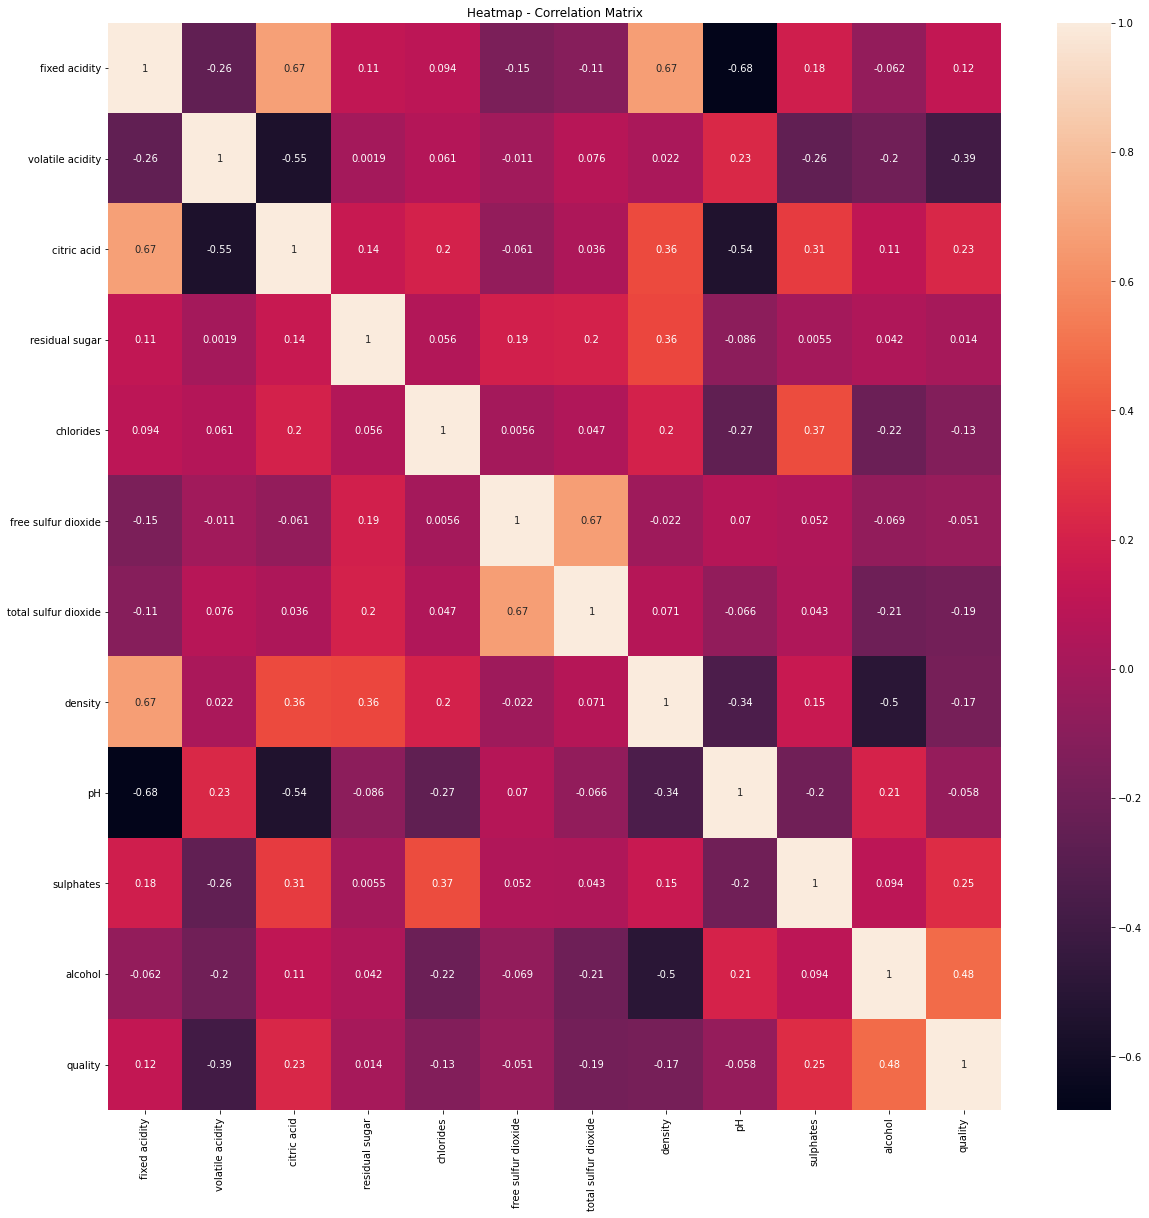

In [62]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cor, annot=True)
plt.title('Heatmap - Correlation Matrix')

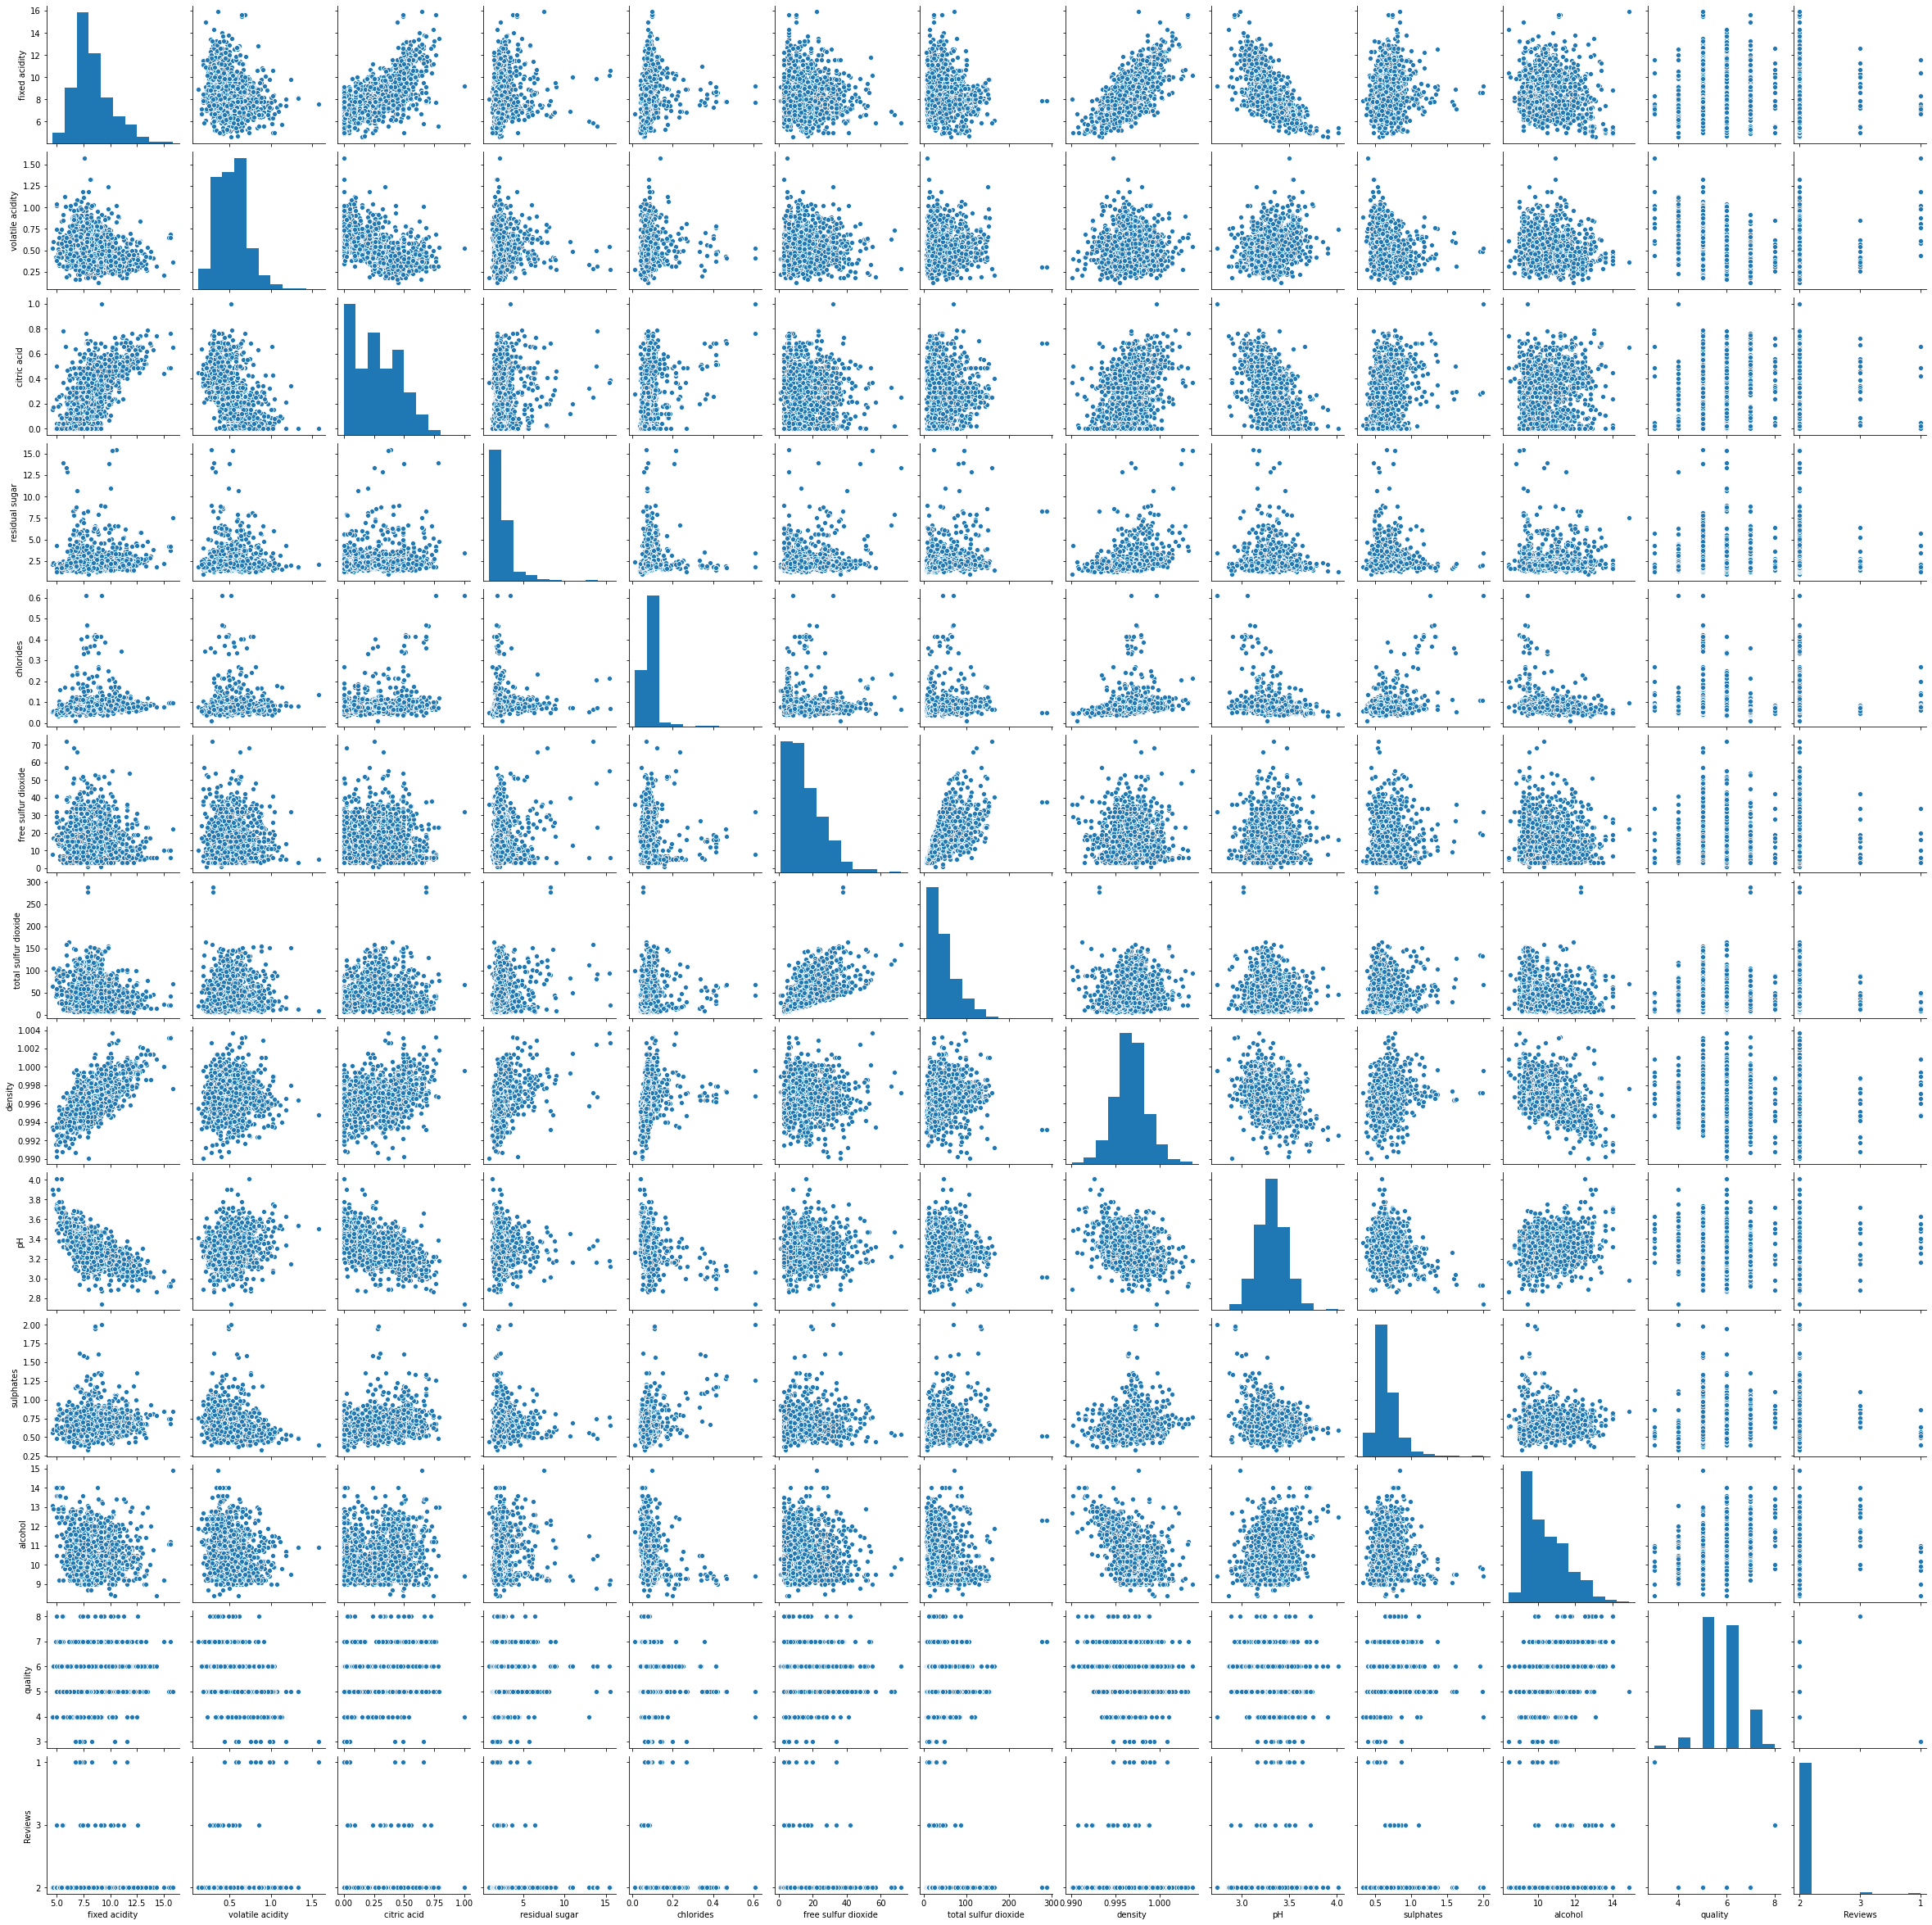

In [63]:
sns.pairplot(data)

**KNN**

In [29]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(x,y,test_size=0.10 , random_state=3,shuffle=True)

In [31]:
X_train1,X_test1 = X_train, X_test

In [32]:
X_train2,X_test2 = X_train, X_test

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
s_c = StandardScaler()
X_train=s_c.fit_transform(X_train)
X_test=s_c.fit_transform(X_test)

In [35]:
Knn = KNeighborsClassifier (n_neighbors=7,p=1)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

**PREDICTING ON THE TEST SET**

<AxesSubplot:>

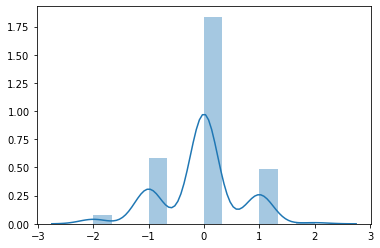

In [65]:
y_pred=Knn.predict(X_test)
#y_pred
sns.distplot(y_test - y_pred)

<AxesSubplot:>

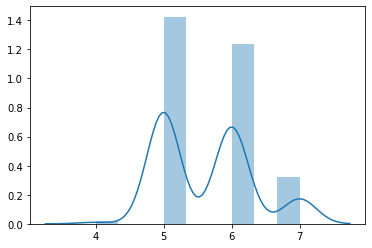

In [66]:
sns.distplot(y_pred)

**ACCURACY CHECK FOR KNN**

In [38]:
100*accuracy_score(y_test,y_pred)

61.25000000000001

**LOGISTIC REGRESSION**

In [39]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#I did this because we reached the maximum number of iterations by using quality 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [40]:
#view final data
data.columns
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [41]:
x = data.iloc[:,:11]
y = data['Reviews']

In [42]:
s_c = StandardScaler()
X_train=s_c.fit_transform(X_train)
X_test=s_c.fit_transform(X_test)

**PREDICTING ON THE TEST SET**

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

**ERROR CHECK FOR LINEAR REGRESSION**

In [52]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test, lr_predict))

0.4777324550359204


In [53]:
print(metrics.mean_squared_error(y_test, lr_predict))

0.37757615073768197


<AxesSubplot:>

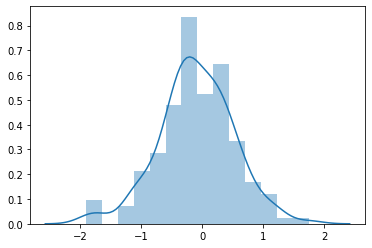

In [60]:
sns.distplot(y_test - lr_predict)

<AxesSubplot:>

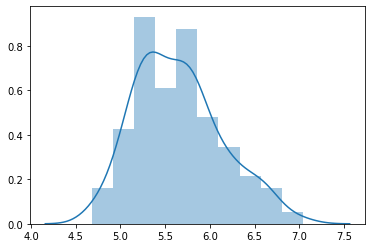

In [59]:
sns.distplot(lr_predict)